## Import Library dan Dataset
### Langkah 1: import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.
### Dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset
dataset = pd.read_csv('data/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

## Feature Scaling
### Untuk melakukan penskalaan fitur x dan target y menggunkan standardscaler, hal ini diperlukan karena SVM sangat sensitif terhadap skala data.


In [2]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

## Fitting SVR ke Dataset
### pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [4]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Visualisasi Hasil SVR
### visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

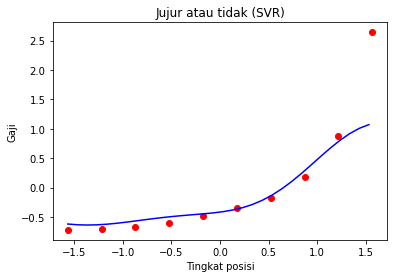

In [5]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 00.1).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

## Prediksi Hasil
### Langkah 1: Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
### Langkah 2: Menskalakan fitur prediksi menggunakan sc_X.transform.
### Langkah 3: Melakukan prediksi menggunakan model SVR yang telah dilatih.
### Langkah 4: Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [6]:
# Prediksi hasil
# Membuat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])

# Membuat penskalaan fitur untuk data yang akan dipredikso
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)

# Melakukan prediksi menggunakan model SVR
gajji_prediksi = regressor.predict(tingkat_posisi_prediksi)

# kembalikan hasil prediksi ke skala aslinya
gajji_prediksi = sc_y.inverse_transform(gajji_prediksi.reshape(-1, 1))


## Menampilkan Hasil
### Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


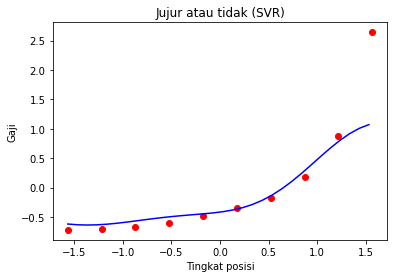

In [9]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gajji_prediksi[0])

X_grid = np.arange(min(X), max(X), 00.1).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

##### Keterangan
##### Hasil output Gambar 3.10 adalah grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.
##### Grafik SVR:
##### Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model.
##### Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.
##### Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar $170,370.02. Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar $170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan. Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai tingkat_posisi_prediksi.

## Evaluasi Model SVR
### evaluasi model meliputi MAE, MSE dan R-squared

In [12]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798
